## Example 1:
from: ../data/real/00-complete/dirty_data.csv

In [1]:
from pipeline.dataset import Dataset
from pipeline.outlier import high_correlators
df_dirty = Dataset('../data/real/00-complete/dirty_data.csv') #Import dataset

In [2]:
df_dirty.scan_columns() #The data is scanned for columns that contain flags (unit, quality)
#If quality is available in the data, certain values will be replaced with nan (not in this example)

In [3]:
df_dirty.infer_format() #Infer optimal date format from start- and end row
#The format is saved as a member of the object. Other methods will access that member

Chosen format: %H:%M:%S


In [4]:
df_dirty.apply_format() #Scan thorugh every element on the time-column and apply date format if possible
#Formats that can't be parsed will be marked and inferred from surrounding (working) stamps later on...

1230 timestamps could not be parsed and will be inferred later on


In [5]:
df_dirty.clean_stamps() #Consecutive stamps that make no sense will be inferred from surrounding stamps
#e.g.: 60 consecutive stamps with same time value, or formats that have been marked from earlier

Recurring timestamps that need to be cleaned: ['11:01:00' '0x0']
Changing duplicate timestamps 11:01:00
Changing duplicate timestamps 0x0


In [6]:
df_dirty.time_as_index() #The column containing timestamps is made index

True

In [7]:
df_dirty.resample() #Time series is resampled using median frequency of original time series
#This results in equidistant stamps

Index already datetime
Sampling rates in the dataset: 
0 days 00:00:01    25142
0 days 00:00:02       29
Name: Unnamed: 0, dtype: int64
Median: 0 days 00:00:01
29 rows were added due to resampling


In [8]:
df_dirty.convert_na() #All columns are converted to numerical.
#Any connectivity errors in the form of strings will be replaced with nan

Converted column: 'FT101/OUT.CV' to numeric
Converted column: 'FT102/OUT.CV' to numeric
Converted column: 'TT101/OUT.CV' to numeric
Converted column: 'PT101/OUT.CV' to numeric
Converted column: 'FT103/OUT.CV' to numeric
Converted column: 'FT104/OUT.CV' to numeric
Converted column: 'TT102/OUT.CV' to numeric
Converted column: 'FT104/AI2/OUT.CV' to numeric
Converted column: 'PT102/OUT.CV' to numeric
Converted column: 'Pressure measure' to numeric


In [9]:
 #Finally, all rows/cells containing NaN up to this point are interpolated
df_dirty.interpolate(limit=0.2) #Method: time 
#Strategy: If consecutive gap is bigger than 20% of all samples, it will not be filled 

Before interpolation 405 rows contain nan values
After interpolation 0 rows contain nan values


In [10]:
df_dirty.drop_dup_cols() #Duplicate columns are dropped

PT101/OUT.CV Pressure measure are equal
FT103/OUT.CV FIC103/PID1/PV.CV are equal
Column: 'Pressure measure' was dropped
Column: 'FIC103/PID1/PV.CV' was dropped


## Outlier Detection and Cleaning
- This is one of the most sensitive parts of pre-processing.  
- Some outliers may be measurement errors, while others may be natural anomalies.
---
### Strategy:
- Thus our solution is semi-automatic: outliers that may be measurement errors (or NaN-values e.g. '9999') are only flagged.
- The user then decides whether the flagged outliers will be cleaned by the framework
- The user may also specify whether all the detected outliers - even those not flagged as measurement error, should be cleaned
- The user may also specify if only certain detected outliers should be cleaned


#### Following this, the user will have to look at each column individually:

In [11]:
df_dirty.print_cols()

0: FT101/OUT.CV
1: FT102/OUT.CV
2: TT101/OUT.CV
3: PT101/OUT.CV
4: FT103/OUT.CV
5: FT104/OUT.CV
6: TT102/OUT.CV
7: FT104/AI2/OUT.CV
8: PT102/OUT.CV
9: FIC103/PID1/OUT.CV
10: FIC103/PID1/SP.CV
11: FIC104/PID1/OUT.CV
12: FIC104/PID1/SP.CV
13: FIC104/PID1/PV.CV


In [12]:
#First, get dict of columns that show high correlation with other columns:
dct = high_correlators(df_dirty.df, 0.7) #In this case if correlation is higher than 0.7

Flag outliers using multivariate outlier detection (this column correlates with other columns)
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


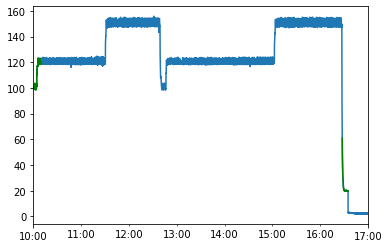

In [13]:
#Row: 0
df_dirty.flag_outliers('FT101/OUT.CV',dct)

In the above case, none of the detected outliers were found to be measurement errors.  
The user may move on to the next column or decide that these outliers should still be removed 

Flag outliers using univariate outliers
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


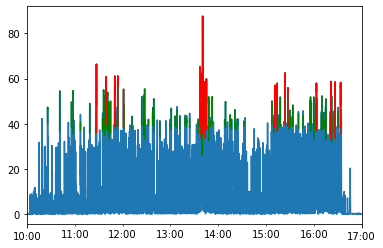

In [14]:
#Row: 1
df_dirty.flag_outliers('FT102/OUT.CV',dct)

Flag outliers using univariate outliers
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


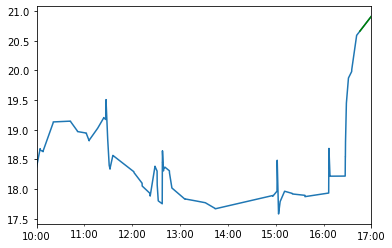

In [15]:
#Row: 2
df_dirty.flag_outliers('TT101/OUT.CV',dct)

Flag outliers using multivariate outlier detection (this column correlates with other columns)
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


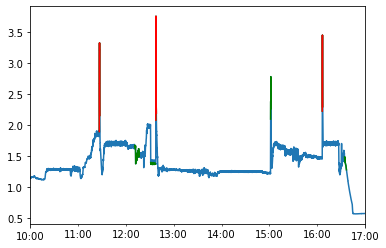

In [16]:
#Row: 3
df_dirty.flag_outliers('PT101/OUT.CV',dct)

Flag outliers using univariate outliers
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


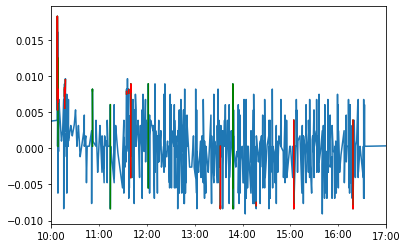

In [17]:
#Row: 4
df_dirty.flag_outliers('FT103/OUT.CV',dct)

Flag outliers using multivariate outlier detection (this column correlates with other columns)
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


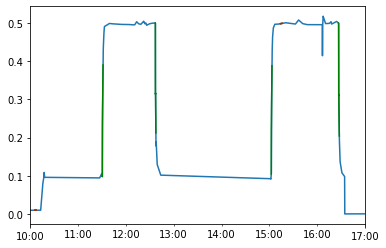

In [18]:
#Row: 5
df_dirty.flag_outliers('FT104/OUT.CV',dct)

In [19]:
#Row: 6
df_dirty.flag_outliers('TT102/OUT.CV',dct)

Flag outliers using univariate outliers
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning
No outliers found


Flag outliers using univariate outliers
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


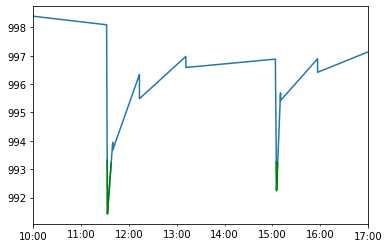

In [20]:
#Row: 7
df_dirty.flag_outliers('FT104/AI2/OUT.CV',dct)

Flag outliers using multivariate outlier detection (this column correlates with other columns)
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


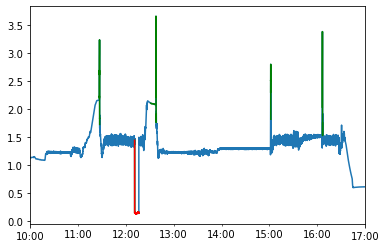

In [21]:
#Row: 8
df_dirty.flag_outliers('PT102/OUT.CV',dct)

Cleaning the automatically flagged outliers
Cleaning 1 outliers
Before interpolation 316 rows contain nan values
After interpolation 0 rows contain nan values


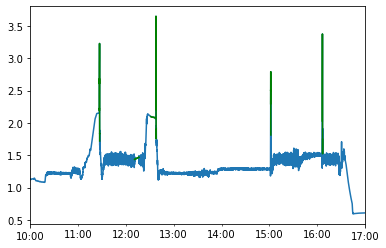

In [22]:
df_dirty.clean_flagged_outliers('PT102/OUT.CV')

In [23]:
#Row: 9
df_dirty.flag_outliers('FIC103/PID1/OUT.CV',dct)

Flag outliers using univariate outliers
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning
No outliers found


Flag outliers using univariate outliers
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


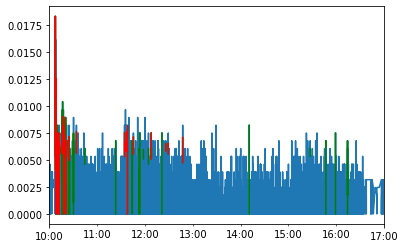

In [24]:
#Row: 10
df_dirty.flag_outliers('FIC103/PID1/SP.CV',dct)

Flag outliers using multivariate outlier detection (this column correlates with other columns)
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


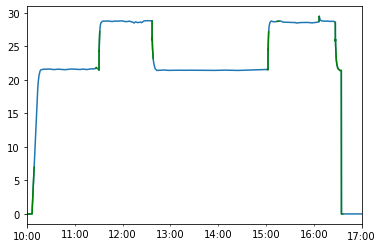

In [25]:
#Row: 11
df_dirty.flag_outliers('FIC104/PID1/OUT.CV',dct)

Flag outliers using multivariate outlier detection (this column correlates with other columns)
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


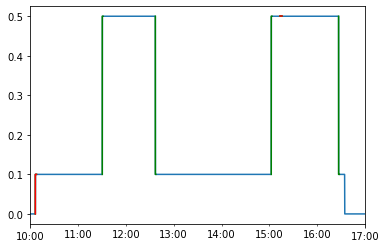

In [26]:
#Row: 12
df_dirty.flag_outliers('FIC104/PID1/SP.CV',dct)

Flag outliers using multivariate outlier detection (this column correlates with other columns)
Detected outliers are marked with red and green.
Green: outliers not marked for cleaning
Red: outliers marked for cleaning


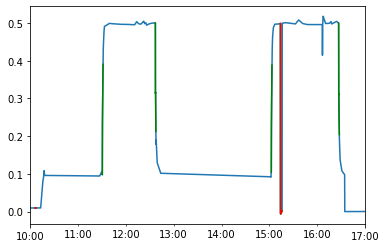

In [27]:
#Row: 13
df_dirty.flag_outliers('FIC104/PID1/PV.CV',dct)

Cleaning the automatically flagged outliers
Cleaning 2 outliers
Before interpolation 208 rows contain nan values
After interpolation 0 rows contain nan values


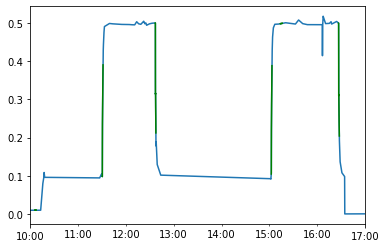

In [28]:
df_dirty.clean_flagged_outliers('FIC104/PID1/PV.CV')

In [29]:
import os
cwd = os.getcwd()
cwd
df_dirty.to_csv(cwd+'/example_1.csv',index=True)